In [1]:
import numpy as np
import statistics as stat
import math
from math import comb
from itertools import permutations
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
def einstein_multiplicity(N, q):
    return comb(q+N-1, q)

In [3]:
mult_A = []
mult_B = []
mult_total = []

energy_units = 100
num_oscillators_A = 196
num_oscillators_B = 196
q_A = 0
q_B = energy_units
for i in range(0, energy_units + 1):
    mult_A.append(einstein_multiplicity(num_oscillators_A, q_A))
    mult_B.append(einstein_multiplicity(num_oscillators_B, q_B))
    mult_total.append(mult_A[i] * mult_B[i])
    q_A = q_A + 1
    q_B = q_B - 1

In [22]:
import seaborn as sns

<AxesSubplot:>

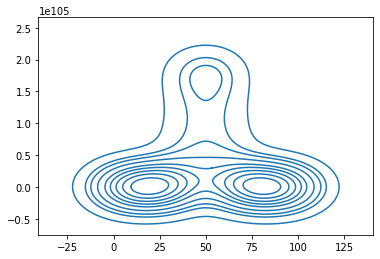

In [28]:
sns.kdeplot(x=range(0, energy_units+1), y=mult_total)

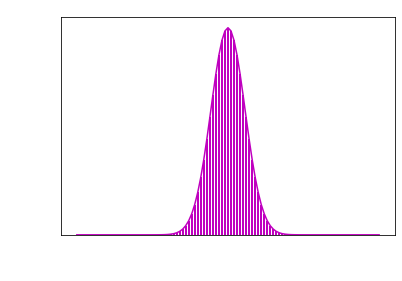

In [43]:
plt.plot(range(0,energy_units+1), mult_total, color='m')
plt.bar(range(0,energy_units+1), mult_total, color='m', width=0.67)
plt.xlabel("$q_{\mathrm{A}}$", color="w", fontsize=18)
plt.ylabel("$\Omega_{\mathrm{total}}$", color='w', fontsize=18)
plt.tick_params(colors='w', which='both')
plt.savefig('microstates.png')

In [61]:
df = pd.DataFrame(list(zip(mult_A, mult_B, mult_total)), columns=['Omega_A', 'Omega_B', 'Total'])
sum = df['Total'].sum()
p45to55 = df['Total'][45:56].sum() / sum
p0to40 = df['Total'][0:41].sum() / sum
p0to30 = df['Total'][0:31].sum() / sum
p0to10 = df['Total'][0:11].sum() / sum
p0 = df['Total'][0] / sum
print(f"Percentage of at least 40 balls being in A: {p0to40}\n"  
f"Percentage of at least 30 balls being in A: {p0to30}\n"
f"Percentage of at least 10 balls being in A: {p0to10}\n"
f"Percentage of zero balls in A: {p0}")
#df.head(60)

Percentage of at least 40 balls being in A: 0.04455246124754416
Percentage of at least 30 balls being in A: 0.00020424567044255318
Percentage of at least 10 balls being in A: 9.997194994143285e-15
Percentage of zero balls in A: 2.000977844003591e-26


In [11]:
df.Omega_A = df.Omega_A.apply(lambda x: np.format_float_scientific(x, 2))
df.Omega_B = df.Omega_B.apply(lambda x: np.format_float_scientific(x, 2))
df.Total = df.Total.apply(lambda x: np.format_float_scientific(x, 2))

In [12]:
df[:4]

,Omega_A,Omega_B,Total
0,1.e+00,5.38e+80,5.38e+80
1,1.96e+02,1.83e+80,3.58e+82
2,1.93e+04,6.15e+79,1.19e+84
3,1.27e+06,2.06e+79,2.62e+85


In [13]:
df[49:52]

,Omega_A,Omega_B,Total
49,8.92e+51,2.11e+53,1.88e+105
50,4.37e+52,4.37e+52,1.91e+105
51,2.11e+53,8.92e+51,1.88e+105


In [14]:
df[98:]

,Omega_A,Omega_B,Total
98,6.15e+79,1.93e+04,1.19e+84
99,1.83e+80,1.96e+02,3.58e+82
100,5.38e+80,1.e+00,5.38e+80


In [20]:
total_list = df.Total.tolist()

percentage=0
for i in range(0, 1):
    percentage += (total_list[i] / sum(total_list) * 100)
percentage

1.697222577073431e-24